In [1]:
import pandas as pd

In [32]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [35]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

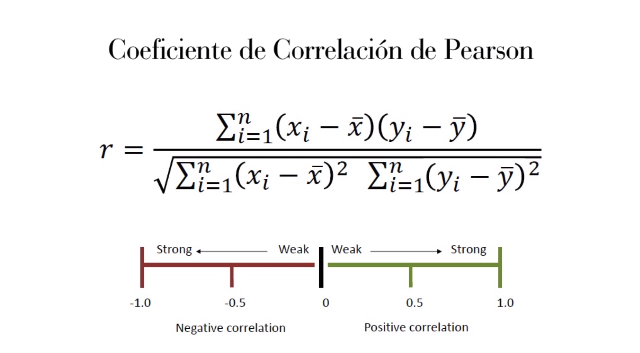

In [14]:
import numpy as np
from IPython.display import Image
Image(filename="resources/Pearson.png")

In [15]:
#agregamos una columna adicional al dataset que es la correlación
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [16]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [10]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [17]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [18]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [19]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [25]:
corr_p = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [26]:
corr_p

0.782224424861606

In [27]:
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p
    

In [28]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [36]:
cols = data_ads.columns.values

In [37]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [38]:
for x in cols:
    for y in cols:
        print(x + "," + y + ":" + str(corr_coeff(data_ads, x, y)))
 

TV,TV:1.0
TV,Radio:0.05480866446583006
TV,Newspaper:0.056647874965056993
TV,Sales:0.782224424861606
Radio,TV:0.05480866446583006
Radio,Radio:1.0
Radio,Newspaper:0.35410375076117545
Radio,Sales:0.576222574571055
Newspaper,TV:0.056647874965056993
Newspaper,Radio:0.35410375076117545
Newspaper,Newspaper:1.0
Newspaper,Sales:0.22829902637616534
Sales,TV:0.782224424861606
Sales,Radio:0.576222574571055
Sales,Newspaper:0.22829902637616534
Sales,Sales:1.0


In [39]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV Vs Ventas del producto')

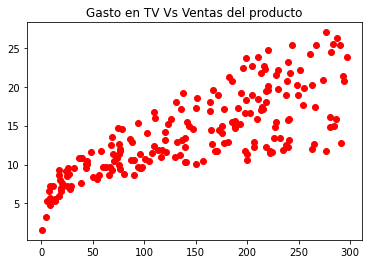

In [41]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV Vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Radio Vs Ventas del producto')

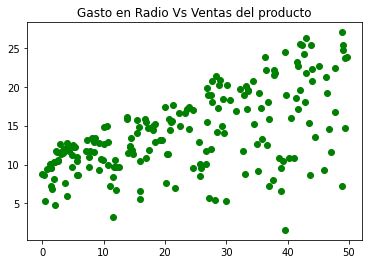

In [44]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio Vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Periódico Vs Ventas del producto')

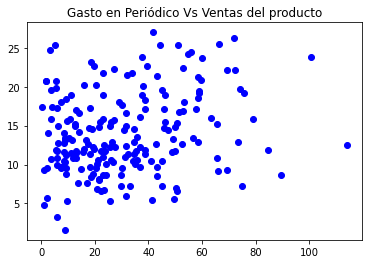

In [45]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico Vs Ventas del producto")

In [46]:
data_ads1 = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


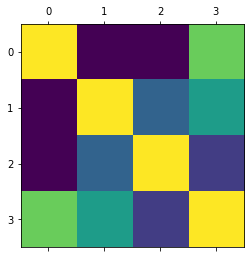

In [47]:
plt.matshow(data_ads1.corr())